# Section 7.1.1: The stochastic block model

This page contains simulations in Section 7.1.1.

## Contents

    - Classification accuracy of a $2$-class symmetric SBM


## Classification accuracy of a $2$-class symmetric SBM


In [1]:
import numpy as np
import scipy.sparse.linalg
import scipy.special
import matplotlib.pyplot as plt
pi = np.pi

qfunc = lambda x : 0.5 - 0.5*scipy.special.erf(x/np.sqrt(2))

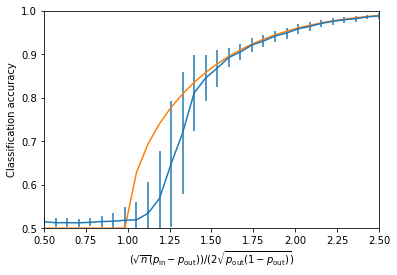

In [2]:
n = 512
pout=.4
range_pin = pout + np.linspace(.5,2.5,30)*(2*np.sqrt(pout*(1-pout))/np.sqrt(n))

cs = [1/2,1/2]
k = len(cs)

loops = 100
classif_emp  = np.zeros( (len(range_pin),loops) )
classif_theo = np.zeros(len(range_pin))

for i,pin in enumerate(range_pin):
    for loop in range(loops):
        A11 = np.random.binomial(1,pin,(int(n*cs[0]),int(n*cs[0])))
        A11 = np.tril(A11,-1)+np.tril(A11,-1).T
        A22 = np.random.binomial(1,pin,(int(n*cs[1]),int(n*cs[1])))
        A22 = np.tril(A22,-1)+np.tril(A22,-1).T
        A12 = np.random.binomial(1,pout,(int(n*cs[0]),int(n*cs[1])))

        A = np.concatenate([np.concatenate([A11,A12]),np.concatenate([A12.T,A22])],1)
        A = A - np.diag(np.diag(A))
        d = np.sum(A,axis=1)

        B = 1/np.sqrt(pout*(1-pout)*n)*(A-np.outer(d,d)/np.sum(d)) # slightly different from the notation in the book

        u = scipy.sparse.linalg.eigs(B,1)[1].reshape(n)
        classif_emp[i,loop] = np.max([np.sum(u[:int(cs[0]*n)]>0)+np.sum(u[int(cs[0]*n):]<0),np.sum(u[:int(cs[0]*n)]<0)+np.sum(u[int(cs[0]*n):]>0)])/n

    if np.abs(pin-pout)> 2*np.sqrt(pout*(1-pout)/n):
        classif_theo[i] = 1 - qfunc(np.sqrt( n*(pin-pout)**2/4/pout/(1-pout) - 1))
    else:
        classif_theo[i] = .5

range_dif = np.sqrt(n)*(range_pin-pout)/2/np.sqrt(pout*(1-pout))

plt.errorbar(range_dif, np.mean(classif_emp,1), np.std(classif_emp,1))
plt.plot(range_dif,classif_theo)
plt.gca().set_xlim([np.min(range_dif),np.max(range_dif)])
plt.gca().set_ylim([.5,1])
plt.xlabel(r'$(\sqrt{n}(p_{\rm in}-p_{\rm out}))/(2\sqrt{p_{\rm out}(1-p_{\rm out})})$')
plt.ylabel(r'Classification accuracy')
_ = plt.show()